# Analysis-of-Flight-Delays-and-Cancellations

## Table Of Contents

- [Project Overview](#project-overview)
- [Project Details](#project-details)
- [Project Questions](#project-questions)
- [Data Sources](#data-sources)
- [Tools](#tools)
- [Python Libraries](#python-libraries)
- [Data Cleaning/Preparation](#data-cleaning/preparation)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Data Analysis](#data-analysis)
- [Code](#code)
- [Recommendations](#recommendations)
- [Limitations](#limitations)
- [References](#references)

## Project Overview
The objective of this project is to analyze a comprehensive dataset containing flight information, including departure and arrival times, delays, distances, weather conditions, and airline details. By exploring this data, we aim to identify significant patterns and correlations that contribute to flight delays. This analysis will help to understand the key factors influencing delays, allowing us to develop predictive models and actionable insights to improve airline punctuality and operational efficiency. Through careful data exploration and modeling, this project seeks to support better decision-making for airlines and enhance the overall passenger experience by reducing delays.

### Project Details:

A date-time index was created for performing Time Series Analysis and Forecasting, enabling effective plotting and time series evaluations.  
- Departure and arrival times were corrected to ensure data accuracy.  
- Duplication checks were performed to identify inconsistencies or repeated information within the data.  
- A logical relationship between weather variables and flight delays was considered.  
- Data from the CSV file was cleaned and organized.  
- The worst-performing airlines in terms of delays were identified.  
- The best-performing airlines were also determined.  
- Flight performance was analyzed by month to see if certain airlines consistently perform poorly or if performance fluctuates.  
- Routes with the highest probability of falling into the level 1 delay category were identified.

### Project Questions:
1. Creating a categorical variable to analyze the relationship between each airline and flight distance.
2. Classifying flight distances as follows: less than 500 miles, between 500 and 1000 miles, and above 1000 miles.
3. Identifying the airlines with the highest number of flights conducted.
4. Comparing airlines based on delays.
5. Examining if airline performance varies by month; display the top 5 best and bottom 5 worst performing airlines.
6. Determining the percentage of cancellations and visualize this by airline.
7. Investigating if certain times of day or year experience longer delays.
8. Identifying routes with the longest delay durations.

### Data Sources
- Airline Flight Delay and Cancellation Data, August 2019 - August 2023 obtained from the US Department of Transportation, Bureau of Transportation Statistics.
- [Download Here](https://www.transtats.bts.gov)


### Tools
- Python

### Python Libraries
- NumPy: A fundamental package for numerical computations in Python.
- Pandas: A library providing high-performance, easy-to-use data structures and data analysis tools for Python.
- Matplotlib: A plotting library for creating static, animated, and interactive visualizations in Python.
- Seaborn: A Python data visualization library based on Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

### Data Cleaning/Preparation
In the initial data preparation phase, we performed the following tasks:
1. Creating a date-time variable for time series analysis and the initial data preparation.
2. Correcting departure and arrival times for data preprocessing.
3. Checking for duplicates to ensure data quality.
4. Cleaning the data in the CSV file for accurate analysis.

## Exploratory Data Analysis 

### Data Analysis

- Creating a categorical variable to understand the relationship between each airline and distance.
- Classifying flight distances into three main groups: distances under 500 miles, distances between 500-1000 miles, and distances of 1000 miles and above.
- Identifying the airlines that perform the most flights.
- Comparing the performance of airlines based on delays.
- Analyzing whether airline performance varies by different months of the year and showing the top 5 best and worst airline performances.
- Determining the percentage of flight cancellations and show how it varies by airline.
- Is there a specific time of day and/or time of year when delay durations are higher?
- Identifying the routes with the highest delay durations.

# Code

# Step 1: Import Libraries
We start with importing the necessary libraries.

In [19]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy import stats

# Step 2: Read Dataset

In [ ]:
```Python
df = pd.read_csv('/kaggle/input/flights/flights.csv')
df.head()
```
```Python
df_copy= pd.read_csv('/kaggle/input/flights/flights.csv')
df_copy
```

**Dataset Description**

This dataset provides detailed information about flights, including scheduling, delays, airline information, and relevant weather conditions. It spans a range of features that enable an in-depth exploration of factors influencing flight timeliness. Below is a description of the primary features in the dataset:

1. **Date Information**:
   - `year`: Year of the flight.
   - `month`: Month of the flight, allowing for seasonal analysis.
   - `day`: Day of the month the flight was scheduled.

2. **Flight Timing and Delay**:
   - `dep_time`: Actual departure time.
   - `sched_dep_time`: Scheduled departure time.
   - `dep_delay`: Difference between actual and scheduled departure times (in minutes), indicating delays.
   - `arr_time`: Actual arrival time.
   - `sched_arr_time`: Scheduled arrival time.
   - `arr_delay`: Difference between actual and scheduled arrival times (in minutes), indicating arrival delays.

3. **Flight and Airline Information**:
   - `carrier`: The airline carrier code.
   - `flight`: Flight number, identifying each flight uniquely.
   - `tailnum`: Aircraft tail number, unique to each plane.
   - `origin`: Airport code of the departure location.
   - `dest`: Airport code of the destination.
   - `route`: Route of the flight (e.g., SEA-IAH).

4. **Weather Conditions**:
   - `temp`: Temperature (°F) at the departure airport.
   - `dewp`: Dew point (°F), indicating moisture in the air.
   - `humid`: Relative humidity (%) at the departure airport.
   - `wind_dir`: Wind direction in degrees.
   - `wind_speed`: Wind speed (knots) at the departure airport.
   - `wind_gust`: Gust speed (knots) at the departure airport.
   - `precip`: Precipitation amount (inches), indicating rainfall or snowfall.
   - `pressure`: Atmospheric pressure (hPa) at the departure airport.
   - `visib`: Visibility (miles), representing clear or obstructed conditions.
  

# Step 3: Dataset Overview
A comprehensive overview of the dataset:

```
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111006 non-null  int64  
 1   month           111006 non-null  int64  
 2   day             111006 non-null  int64  
 3   dep_time        108566 non-null  float64
 4   sched_dep_time  111006 non-null  int64  
 5   dep_delay       108566 non-null  float64
 6   arr_time        108469 non-null  float64
 7   sched_arr_time  111006 non-null  int64  
 8   arr_delay       108332 non-null  float64
 9   carrier         111006 non-null  object 
 10  flight          111006 non-null  int64  
 11  tailnum         110877 non-null  object 
 12  origin          111006 non-null  object 
 13  dest            111006 non-null  object 
 14  air_time        108332 non-null  float64
 15  distance        111006 non-null  int64  
 16  hour            111006 non-null  int64  
 17  minute          111006 non-null  int64  
 18  airline         111006 non-null  object 
 19  route           111006 non-null  object 
 20  temp            111006 non-null  float64
 21  dewp            111006 non-null  float64
 22  humid           111006 non-null  float64
 23  wind_dir        107843 non-null  float64
 24  wind_speed      110727 non-null  float64
 25  wind_gust       110727 non-null  float64
 26  precip          111006 non-null  float64
 27  pressure        111006 non-null  float64
 28  visib           111006 non-null  float64
dtypes: float64(14), int64(9), object(6)
memory usage: 24.6+ MB
```
**Inferences:**

- The dataset comprises **111,006 entries (rows)** and **29 columns**, offering extensive data on various flight characteristics, delays, and weather conditions.
- The columns contain a mix of **data types**:
  - **Integer (`int64`)**: 9 columns, primarily representing time components, distance, and identifiers.
  - **Float (`float64`)**: 14 columns, which include precise timing data, delay metrics, and weather-related variables.
  - **Object**: 6 columns, usually representing categorical data such as airline carriers, route information, and airport codes.
- The dataset has some **missing values** in specific columns:
  - **Timing and Delay Information**: Columns such as `dep_time`, `dep_delay`, `arr_time`, `arr_delay`, and `air_time` have missing values, suggesting that not all flights have complete timing and delay data.
  - **Aircraft Identifier**: The `tailnum` column also has some missing entries, indicating gaps in identifying specific aircraft for certain flights.
  - **Weather Variables**: Columns such as `wind_dir`, `wind_speed`, and `wind_gust` contain missing values, likely due to unavailable weather data at certain times.


## Step 3.2 Summary Statistics for Numerical Variables

| Variable      | Count     | Mean       | Std       | Min   | 25%       | 50%       | 75%       | Max       |
|---------------|-----------|------------|-----------|-------|-----------|-----------|-----------|-----------|
| year          | 111006.0  | 2022.000000 | 0.000000  | 2022.00 | 2022.000000 | 2022.000000 | 2022.000000 | 2022.000000 |
| month         | 111006.0  | 3.623264   | 1.713287  | 1.00  | 2.000000  | 4.000000  | 5.000000  | 6.000000  |
| day           | 111006.0  | 15.736654  | 8.723487  | 1.00  | 8.000000  | 16.000000 | 23.000000 | 31.000000 |
| dep_time      | 108566.0  | 1336.449487| 540.664793| 1.00  | 912.000000| 1309.000000 | 1800.000000 | 2400.000000 |
| sched_dep_time| 111006.0  | 1342.068158| 530.610560| 2.00  | 910.000000| 1305.000000 | 1800.000000 | 2359.000000 |
| dep_delay     | 108566.0  | 8.038456   | 41.687738 | -36.00 | -5.000000 | -2.000000 | 6.000000  | 2120.000000 |
| arr_time      | 108469.0  | 1467.243636| 570.938019| 1.00  | 1055.000000 | 1520.000000 | 1917.000000 | 2400.000000 |
| sched_arr_time| 111006.0  | 1506.330090| 546.796862| 3.00  | 1115.000000 | 1540.000000 | 1937.000000 | 2359.000000 |
| arr_delay     | 108332.0  | 2.359524   | 43.088734 | -65.00 | -14.000000 | -5.000000 | 6.000000  | 2098.000000 |
| flight        | 111006.0  | 433.663856 | 267.779635| 1.00  | 210.000000 | 416.000000 | 644.000000 | 1100.000000 |
| air_time      | 108332.0  | 136.527628 | 82.487434 | 17.00 | 78.000000  | 120.000000 | 193.000000 | 397.000000 |
| distance      | 111006.0  | 1068.619183| 746.859903| 93.00 | 543.000000 | 909.000000 | 1542.000000 | 2724.000000 |
| hour          | 111006.0  | 13.135614  | 5.269788  | 0.00  | 9.000000   | 13.000000  | 18.000000  | 23.000000 |
| minute        | 111006.0  | 28.506729  | 18.354465 | 0.00  | 15.000000  | 30.000000  | 45.000000  | 59.000000 |
| temp          | 111006.0  | 48.155538  | 9.363201  | 21.90 | 42.000000  | 47.000000  | 54.000000  | 99.000000 |
| dewp          | 111006.0  | 40.454927  | 7.968649  | 1.00  | 36.000000  | 40.000000  | 46.000000  | 61.000000 |
| humid         | 111006.0  | 76.506300  | 15.192175 | 15.79 | 68.460000  | 79.400000  | 88.670000  | 100.000000 |
| wind_dir      | 107843.0  | 164.500524 | 101.084372| 0.00  | 100.000000 | 180.000000 | 220.000000 | 360.000000 |
| wind_speed    | 110727.0  | 6.995307   | 4.507431  | 0.00  | 4.603120   | 6.904680   | 9.206240   | 27.618720 |
| wind_gust     | 110727.0  | 8.050059   | 5.187061  | 0.00  | 5.297178   | 7.945768   | 10.594357  | 31.783071 |
| precip        | 111006.0  | 0.005774   | 0.022099  | 0.00  | 0.000000   | 0.000000   | 0.000000   | 0.320000  |
| pressure      | 111006.0  | 1020.187948| 7.710084  | 991.00 | 1015.200000 | 1020.700000 | 1025.500000 | 1039.200000 |
| visib         | 111006.0  | 8.922346   | 2.537055  | 0.00  | 10.000000  | 10.000000  | 10.000000  | 10.000000 |


**Inferences:**

- **year**: All records are from the year 2022, indicating no variation in the year feature.
- **month, day**: These columns represent the date of the scheduled flight. `month` varies from January to June, while `day` spans from 1 to 31, suggesting a good distribution across months and days.
- **hour, minute**: These features represent the scheduled departure hour and minute. They cover the full range of hours (0–23) and minutes (0–59), reflecting departures at various times throughout the day.
- **dep_time, sched_dep_time, arr_time, sched_arr_time**: These columns capture actual and scheduled departure and arrival times in 24-hour format. They cover a broad range, indicating flights scheduled and departing throughout the day and night.
- **dep_delay, arr_delay**: Key target variables showing departure and arrival delays in minutes. Values range from negative (early departure/arrival) to positive (late departure/arrival), with `dep_delay` reaching a maximum of 2120 minutes and `arr_delay` up to 2098 minutes.
- **flight**: This is the flight number, which spans from 1 to 1100, indicating a wide range of flight identifiers.
- **air_time**: Flight duration, with values ranging from 17 to 397 minutes, showing the variety in flight lengths within the dataset.
- **distance**: Total distance between origin and destination airports, ranging from 93 to 2724 miles, capturing flights of different lengths.
- **temp, dewp**: Temperature (`temp`) varies from 21.9 to 99°F, and dew point (`dewp`) from 1 to 61°F, reflecting seasonal weather conditions at departure.
- **humid**: Relative humidity ranges from 15.79% to 100%, indicating varied atmospheric moisture conditions.
- **wind_dir, wind_speed, wind_gust**: Wind direction ranges from 0 to 360 degrees, while wind speed and gust vary up to 27.6 and 31.8 knots, respectively, reflecting a range of wind conditions at departure.
- **precip**: Precipitation varies from 0 to 0.32 inches, with many zero entries, suggesting limited rainfall data.
- **pressure**: Atmospheric pressure varies between 991 and 1039.2 hPa, with a median of around 1020.7 hPa.
- **visib**: Visibility ranges from 0 to 10 miles, with the majority at 10 miles, indicating mostly clear conditions.

## Step 3.3 | Summary Statistics for Categorical Variables

```
df.describe(include='object')
```

| Metric   | carrier | tailnum | origin | dest | airline             | route   |
|----------|---------|---------|--------|------|----------------------|---------|
| count    | 111006  | 110877  | 111006 | 111006 | 111006             | 111006  |
| unique   | 12      | 3520    | 2      | 97   | 12                 | 149     |
| top      | AS      | N447QX  | SEA    | LAX  | Alaska Airlines Inc.| SEA-PDX |
| freq     | 41697   | 524     | 82559  | 5450 | 41697              | 3867    |

**Inferences for Categorical Variables:**

- **carrier, airline**: These columns represent the airline carrier code (`carrier`) and the full airline name (`airline`). There are 12 unique airlines in the dataset. The most frequent carrier is Alaska Airlines Inc. (`AS`), accounting for 41,697 flights.
- **tailnum**: This column is a unique identifier for each aircraft, with a total of 3,520 unique aircraft in the dataset. The most frequent aircraft identifier is `N447QX`, appearing in 524 flights.
- **origin, dest**: These columns represent the airport codes for the departure (`origin`) and arrival (`dest`) airports. There are 2 unique origin airports, with Seattle (SEA) being the most frequent departure airport (82,559 flights). For destination airports, there are 97 unique values, with Los Angeles (LAX) being the most common destination, totaling 5,450 flights.
- **route**: This column represents the route of the flight, combining origin and destination codes (e.g., `SEA-PDX`). There are 149 unique routes, with the Seattle to Portland (SEA-PDX) route being the most frequent, appearing in 3,867 flights.




# Step 4: Exploratory Data Analysis

## Step 4.1 Univariate Analysis
We can perform univariate analysis on these columns based on their datatype:
For numerical data, we can use a histogram to visualize the data distribution. The number of bins should be chosen appropriately to represent the data well.
For categorical data, we can use a bar plot to visualize the frequency of each category.

In [ ]:
```Python
import pandas as pd
import matplotlib.pyplot as plt

# List of columns based on data types
numerical_columns = ['year', 'month', 'day', 'sched_dep_time', 'sched_arr_time', 'flight', 'distance', 'hour', 'minute',
                     'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'air_time', 'temp', 'dewp', 'humid', 
                     'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']
categorical_columns = ['carrier', 'tailnum', 'origin', 'dest', 'airline', 'route']

# Univariate analysis for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', color='darkblue', edgecolor='k')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

```


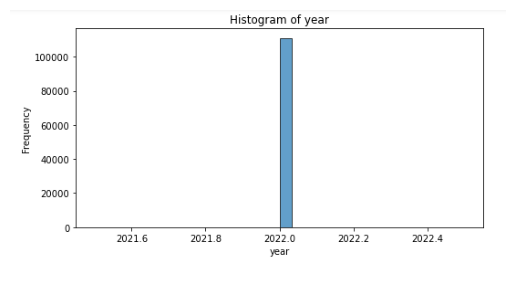

In [25]:
img = mpimg.imread('/kaggle/input/histogram-of-year/histogram_of_year.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### Inference for the Year Histogram

- The histogram shows that all flight data in the dataset is from a single year, 2022. This suggests that the dataset is limited to a one-year period, which could restrict any long-term trend analysis or seasonal comparisons across multiple years.
- With data confined to a single year, the focus of the analysis will be on month-to-month or seasonal patterns within 2022 rather than year-over-year trends.


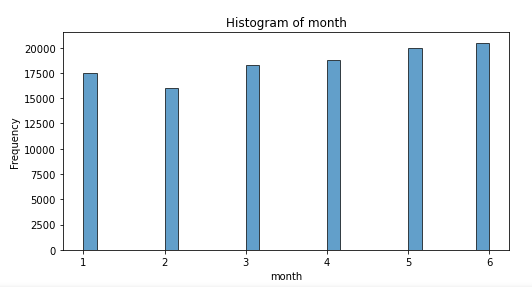

In [27]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/histogram-of-month/histogram_of_month.png'))

### Inference for the Month Histogram

- The histogram shows the distribution of flights across the first six months of the year. The frequency of flights is relatively consistent from month to month, with a slight increase in flight numbers in April, May, and June.
- This could indicate an uptick in air travel as the year progresses, potentially due to seasonal factors such as spring and early summer travel. However, without data from the latter half of the year, it's challenging to identify full seasonal trends.

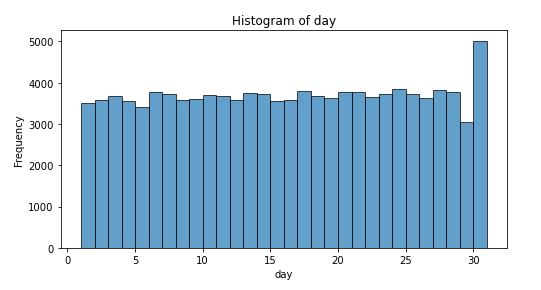

In [37]:
from IPython.display import Image, display

display(Image(filename='/kaggle/input/histogram-of-day/histogram_of_day.png'))

### Inference for the Day Histogram

- The histogram shows a fairly uniform distribution of flights across most days of the month, with each day having a similar number of flights. However, there is a noticeable increase on the 31st day, indicating that months with 31 days (e.g., January, March, May) might have slightly higher flight activity compared to shorter months.
- This increase could reflect peak travel days near the end of these months, possibly due to monthly travel patterns or operational schedules aligning with month-end demand.


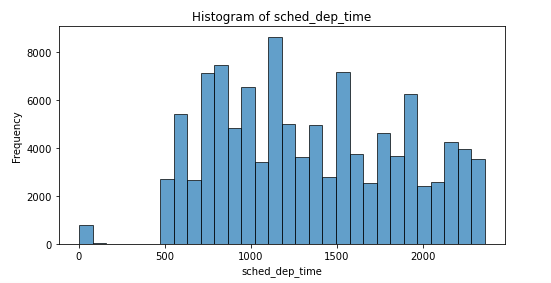

In [38]:
from IPython.display import Image, display

display(Image(filename='/kaggle/input/histogram-of-scheduled-dep-time/histogram_of_scheddeptime.png'))

### Inference for the Scheduled Departure Time Histogram

- The histogram displays the distribution of scheduled departure times throughout the day. Peaks in the early morning (around 500-1000), midday (around 1200-1300), and late afternoon to early evening (around 1700-1900) indicate high-frequency departure periods.
- This pattern likely reflects common scheduling practices, with airlines clustering flights during these times to accommodate peak passenger demand. The low frequency of departures around midnight and early morning hours suggests limited operations during these off-peak times. The small peak near zero may represent flights scheduled very early in the morning or possibly some data anomalies.

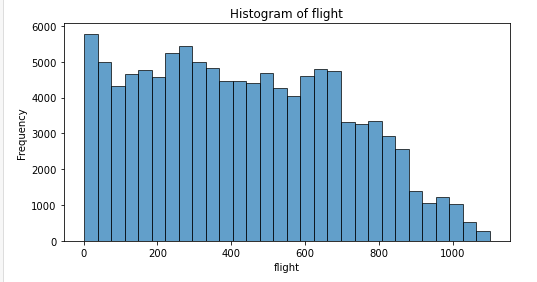

In [39]:
from IPython.display import Image, display

display(Image(filename='/kaggle/input/histogram-of-flight/histogram_of_flight.png'))

### Inference for the Flight Histogram

- The histogram illustrates the distribution of flights based on their flight numbers. There is a high frequency of flights with lower flight numbers (under 600), and the frequency gradually decreases as the flight numbers increase, with fewer flights having numbers above 800.
- This pattern could be due to airline-specific numbering conventions, where lower flight numbers may correspond to more frequent or regular routes, while higher numbers are used for less common flights. The declining frequency toward higher flight numbers may indicate that these are special or seasonal flights, or flights that operate on less busy routes.

In [ ]:
from IPython.display import Image, display

display(Image(filename=

### Inference for the Distance Histogram

The histogram of flight distances shows a distinct pattern with several peaks, suggesting a mixture of short-haul, medium-haul, and long-haul flights in the dataset:

- The highest peaks are observed around 500 miles and 1000 miles, indicating a large number of short- to medium-distance flights. This is typical for regional or domestic routes.
- There is a gradual decline in frequency as distances increase, with fewer long-haul flights (above 1500 miles).
- Another smaller cluster of flights is visible around 2500 miles, likely representing longer domestic or international routes.

In [ ]:
from IPython.display import Image, display

display(Image(filename=

### Inference for the Hour Histogram

The histogram shows the distribution of flight departures by hour of the day:

- There are clear peaks in the early morning (around 6-10 AM) and mid-morning to early afternoon (around 10 AM to 1 PM), indicating that these are popular times for flights to depart. This aligns with typical passenger demand and scheduling patterns, as travelers often prefer morning and midday flights.
- There is another smaller peak in the early evening (around 5-7 PM), likely due to return or evening flights.
- Departure frequency drops significantly in the late evening and early morning hours (midnight to 5 AM), reflecting limited flight activity during these off-peak hours.


In [ ]:
from IPython.display import Image, display

display(Image(filename=

### Inference for the Departure Time Histogram

The histogram shows the distribution of actual departure times throughout the day:

- There are prominent peaks in the morning (around 6-10 AM) and midday (around 12 PM), indicating that most flights are scheduled to depart during these times. This is consistent with passenger demand for morning and midday travel.
- A secondary peak is observed in the late afternoon and early evening (around 5-7 PM), reflecting another common time for departures, likely due to return flights or evening travel preferences.
- Departure frequency drops significantly during the late-night and early-morning hours (after 10 PM and before 5 AM), with limited flight activity during these off-peak hours.

In [ ]:
from IPython.display import Image, display

display(Image(filename=

### Inference for the Departure Delay Histogram

- The histogram of departure delays is highly right-skewed, with most flights having delays close to zero. The majority of departures experience minimal to no delay, indicating that flights generally leave on time or with only a small delay. However, there is a long tail extending to high delay values, with some extreme cases showing delays of several hundred minutes or more.

- This pattern suggests that while severe delays are relatively rare, they can be substantial when they do occur. The right skew highlights that most delays are minor, but a small percentage of flights experience significant departure delays, likely due to operational or weather-related disruptions.

In [ ]:
from IPython.display import Image, display

display(Image(filename=

### Inference for the Arrival Time Histogram

The histogram shows the distribution of arrival times throughout the day:

- Arrival times have several peaks, with the highest frequencies observed around midday (1200-1500) and in the early evening (1700-1900). These patterns suggest that flights are scheduled to arrive during these busy periods, likely aligning with high passenger demand and connecting flight schedules.
- There is a low frequency of arrivals in the early morning hours (0000-0500), indicating limited overnight flights.
- The distribution is relatively balanced throughout the rest of the day, with steady frequencies from morning to late evening.

This pattern aligns with typical airline scheduling, where flights are timed to arrive at convenient intervals for passengers, especially during peak travel hours.

In [ ]:
from IPython.display import Image, display

display(Image(filename=

### Inference for the Arrival Delay Histogram

- The histogram of arrival delays is highly right-skewed, with the majority of flights experiencing minimal to no delay. Most arrival delays are clustered close to zero, indicating that flights generally arrive on time or with only a small delay. However, there is a long tail extending to higher delay values, with a few extreme cases where delays reach several hundred minutes or more.

- This pattern suggests that severe arrival delays are relatively rare but can be substantial when they occur. Overall, the data indicates that most flights have minor arrival delays, with only a small proportion of flights facing significant delays, likely due to unforeseen disruptions or operational issues.

In [ ]:
from IPython.display import Image, display

display(Image(filename=

### Inference for the Air Time Histogram

The histogram of air time shows a distribution with several peaks, indicating a mix of short, medium, and long flights in the dataset:

- The highest frequencies are observed around 50 to 150 minutes, suggesting that most flights in the dataset are short- to medium-haul.
- There is a gradual decline in frequency as air time increases, with fewer flights lasting over 200 minutes. These likely represent longer domestic or international flights.
- Very few flights have air times over 300 minutes, indicating a limited number of long-haul routes in the dataset.

Overall, the distribution suggests that the majority of flights are relatively short, which could be typical of regional or domestic travel patterns. The declining frequency for higher air times reflects fewer long-distance flights.

In [ ]:
from IPython.display import Image, display

display(Image(filename=

### Inference for the Carrier Bar Plot

- The bar plot shows the frequency of flights by carrier. **AS** (Alaska Airlines) has the highest number of flights in the dataset, followed by **QX** (Horizon Air), **DL** (Delta Air Lines), and **OO** (SkyWest Airlines). This indicates that a few carriers dominate the dataset, with Alaska Airlines accounting for a significant portion of flights. Smaller airlines like **G4** (Allegiant Air) and **F9** (Frontier Airlines) have relatively low frequencies, suggesting limited operations or regional focus in the data. This distribution highlights the presence of both major and regional carriers in the dataset.


In [ ]:
from IPython.display import Image, display

display(Image(filename=